In [125]:
from pytriqs.gf import *
import numpy as np

beta = 1000.0
n_iw = 1000
iw_mesh = MeshImFreq(beta, 'Fermion', n_iw)

g = Gf(mesh=iw_mesh, target_shape=[2,2])
g  << inverse(iOmega_n - 1.)

Green Function  with mesh Matsubara Freq Mesh of size 2000, domain Matsubara domain with beta = 1000, statistic = 1, positive_only : 0 and target_rank 2: 

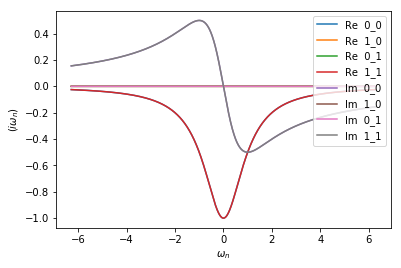

In [126]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
oplot(g)

In [127]:
def eval_tail(g):
    mytail, err  = g.get_tail()
    def f(omega):
        z = 1.
        res = np.zeros(mytail.shape[1:], dtype='complex128')
        for n in range(mytail.shape[0]):
            res[:] += mytail[n,:] * z
            z = z / omega
        return res
    return f

In [128]:
print g.get_tail()[1]

1.65634437101e-11


<function matplotlib.pyplot.show>

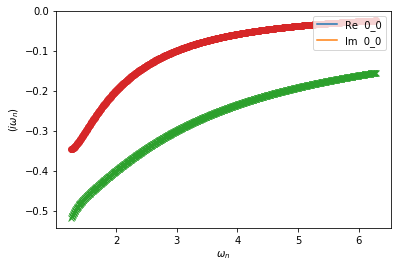

In [129]:
g_tail = eval_tail(g)

x_points = np.array([x.value for x in g.mesh][-n_iw + 200:])
y_points = np.array([g_tail(x,)[0,0] for x in x_points])

#print x_points
#print y_points 
oplot(g[0,0], x_window=(5,20))
plt.plot(x_points.imag, y_points.imag, '-x')
plt.plot(x_points.imag, y_points.real, '-o')
plt.show

In [130]:
print g.get_tail()[0].real

[[[-2.85287376e-08  0.00000000e+00]
  [ 0.00000000e+00 -2.85287376e-08]]

 [[ 9.99999971e-01  0.00000000e+00]
  [ 0.00000000e+00  9.99999971e-01]]

 [[ 9.99995461e-01 -0.00000000e+00]
  [-0.00000000e+00  9.99995461e-01]]

 [[ 9.99995417e-01  0.00000000e+00]
  [ 0.00000000e+00  9.99995417e-01]]

 [[ 9.99711853e-01  0.00000000e+00]
  [ 0.00000000e+00  9.99711853e-01]]

 [[ 9.99709785e-01  0.00000000e+00]
  [ 0.00000000e+00  9.99709785e-01]]

 [[ 9.90843805e-01 -0.00000000e+00]
  [-0.00000000e+00  9.90843805e-01]]

 [[ 9.90800998e-01  0.00000000e+00]
  [ 0.00000000e+00  9.90800998e-01]]

 [[ 8.52956712e-01  0.00000000e+00]
  [ 0.00000000e+00  8.52956712e-01]]

 [[ 8.52626324e-01  0.00000000e+00]
  [ 0.00000000e+00  8.52626324e-01]]]
